<a href="https://colab.research.google.com/github/Stephen-Data-Engineer-Public/SQL/blob/main/Data_Transformation_With_SQL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Extracting the Data and storing it in SQLite3 Database

In [34]:
import pandas as pd
import sqlite3
from IPython.display import display

# Step 1: Read the CSV file into a pandas DataFrame
df = pd.read_csv('/content/email-results-2023.csv')

# Step 2: Connect to a SQLite database
conn = sqlite3.connect('Email_data_result_sample.db')
cursor = conn.cursor()
# Step 3: Write the DataFrame to a SQLite table
df.to_sql('Email_result', conn, if_exists='replace', index=False)

74

# Analyzing the data type held by each column

In [35]:
datatype_check = pd.read_sql('''PRAGMA table_info(Email_result);

''', conn)
display(datatype_check)

,cid,name,type,notnull,dflt_value,pk
0,0,Audience Name,TEXT,0,None,0
1,1,Email Name,TEXT,0,None,0
2,2,Email type,TEXT,0,None,0
3,3,Email Sent Time,TEXT,0,None,0
4,4,Clicked,INTEGER,0,None,0
5,5,Opened,INTEGER,0,None,0
6,6,Click Rate,REAL,0,None,0
7,7,Clicks Per Unique Opens,REAL,0,None,0
8,8,Total clicks,INTEGER,0,None,0
9,9,Emails sent,INTEGER,0,None,0


# Transforming and Cleaning the Dataset

In [36]:
# Remove dollar sign and convert 'Net Revenue' to DECIMAL
conn.execute("""
    UPDATE Email_result
    SET "Net Revenue" = CAST(REPLACE("Net Revenue", '$', '') AS DECIMAL)
""")

# Remove dollar sign and convert 'Average order revenue' to DECIMAL
conn.execute("""
    UPDATE Email_result
    SET "Average order revenue" = CAST(REPLACE("Average order revenue", '$', '') AS DECIMAL)
""")

# Commit the changes
conn.commit()


# Creating a New Column called Period that will hold the period of the day that the Email was sent

In [46]:
sql_query1 = '''
ALTER TABLE Email_result
ADD COLUMN period TEXT;
'''
cursor.execute(sql_query1)

# Execute the second SQL statement to populate the "period" column
sql_query2 = '''
UPDATE Email_result
SET period = CASE
                WHEN CAST(SUBSTR("Email Sent Time", 12, 2) AS INTEGER) BETWEEN 1 AND 11 THEN 'Morning'
                WHEN CAST(SUBSTR("Email Sent Time", 12, 2) AS INTEGER) BETWEEN 12 AND 16 THEN 'Afternoon'
                ELSE 'Evening'
            END;
'''
cursor.execute(sql_query2)

# Optionally, commit the changes
conn.commit()


# Checking Out the New Column

In [55]:
all_data = pd.read_sql('''SELECT * FROM Email_result;

''', conn)
display(all_data)

,Audience Name,Email Name,Email type,Email Sent Time,Clicked,Opened,Click Rate,Clicks Per Unique Opens,Total clicks,Emails sent,...,Bounce Rate,Abuse complaints,Abuse Rate,Net Revenue,Orders,Average order revenue,Fulfilled orders,Canceled orders,Refunded orders,period
0,The Fund for Global Human Rights,EOY22_ThankYouDonors_01.12.23,Regular,12/01/2023 10:40,1,28,0.017857,0.035714,3,56,...,0.000000,0,0.000000,0,0,0,0,0,0,Morning
1,The Fund for Global Human Rights,EOY22_NonDonorsWrapUp_01.12.23,Regular,12/01/2023 11:07,136,4350,0.005305,0.031264,209,25717,...,0.003189,5,0.000195,0,0,0,0,0,0,Morning
2,The Fund for Global Human Rights,MarcelinaVideo_19.01.23,Regular,19/01/2023 10:53,52,2827,0.003449,0.018394,108,15122,...,0.003042,5,0.000332,0,0,0,0,0,0,Morning
3,The Fund for Global Human Rights,Newsletter_January 2022,Regular,30/01/2023 13:15,138,5252,0.005178,0.026276,256,26774,...,0.004519,5,0.000188,0,0,0,0,0,0,Afternoon
4,The Fund for Global Human Rights,CEOAnnouncementRonaCopy_01.02.23,Regular,01/02/2023 09:00,0,1,0.000000,0.000000,0,1,...,0.000000,0,0.000000,0,0,0,0,0,0,Morning
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69,The Fund for Global Human Rights,EOY23 PreGT_NonDonors_27.11.23,Regular,27/11/2023 14:00,51,5465,0.002302,0.009332,146,22302,...,0.006502,3,0.000135,0,0,0,0,0,0,Afternoon
70,The Fund for Global Human Rights,EOY23 LapsedKickoff_27.11.23,Regular,29/11/2023 10:00,0,169,0.000000,0.000000,0,367,...,0.005450,0,0.000000,0,0,0,0,0,0,Morning
71,The Fund for Global Human Rights,EOY23 PostGT_Under2.5KDonors_29.11.23,Regular,29/11/2023 11:15,3,186,0.006637,0.016129,7,455,...,0.006593,0,0.000000,0,0,0,0,0,0,Morning
72,The Fund for Global Human Rights,EOY23 PostGT_NonDonors_29.11.23,Regular,29/11/2023 11:27,50,5199,0.002263,0.009617,115,22239,...,0.006520,0,0.000000,0,0,0,0,0,0,Morning


# Group Data based on Period

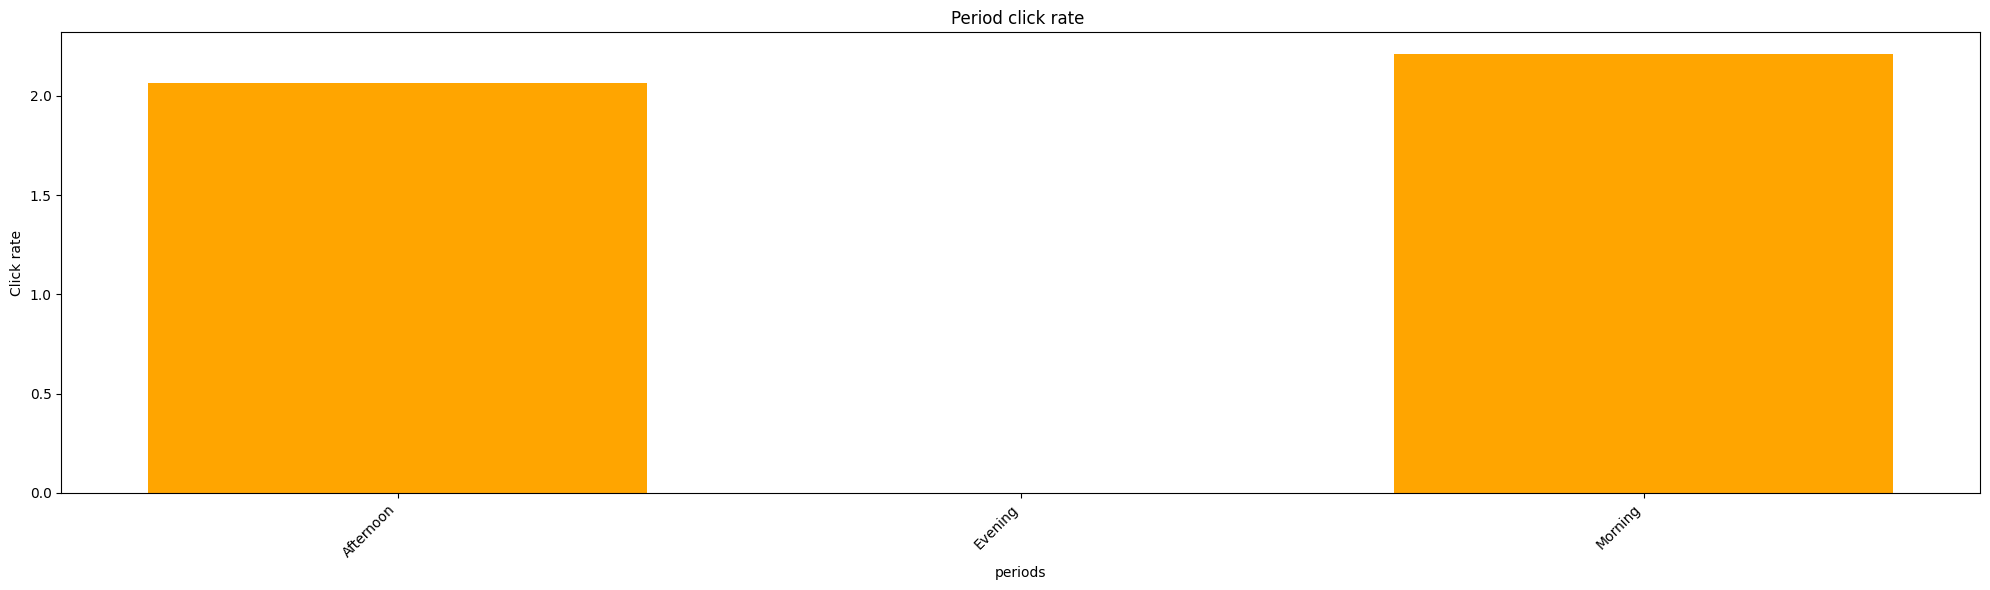

In [57]:

import matplotlib.pyplot as plt

cursor.execute('''
    SELECT SUM([Click Rate]), period
    FROM Email_result
    GROUP BY period;
''')
results = cursor.fetchall()
# Process the data
labels = [result[1] for result in results]
values = [result[0] for result in results]

# Create the plot
plt.figure(figsize=(20, 6))
plt.bar(labels, values, color='Orange')
plt.xlabel('periods')
plt.ylabel('Click rate')
plt.title('Period click rate ')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Show the plot
plt.show()


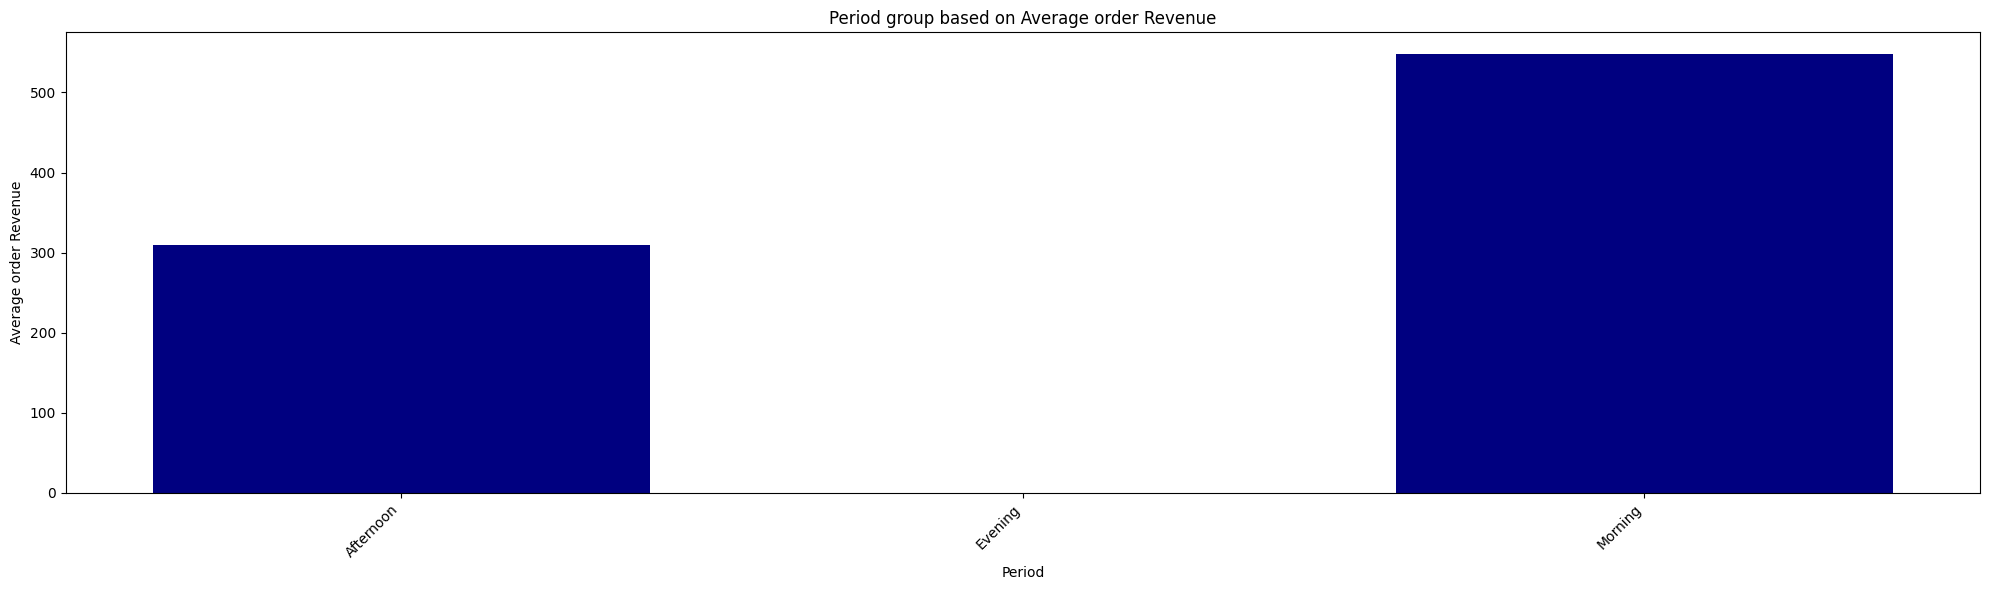

In [58]:
cursor.execute('''
    SELECT SUM([Average order revenue]), period
    FROM Email_result
    GROUP BY period;
''')
results = cursor.fetchall()
# Process the data
labels = [result[1] for result in results]
values = [result[0] for result in results]

# Create the plot
plt.figure(figsize=(20, 6))
plt.bar(labels, values, color='Navy')
plt.xlabel('Period')
plt.ylabel('Average order Revenue')
plt.title('Period group based on Average order Revenue')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Show the plot
plt.show()
